# **Waze Project**

**Regression analysis: Simplify complex data relationships**

Your team is more than halfway through their user churn project. Earlier, you completed a project proposal, used Python to explore and analyze Waze’s user data, created data visualizations, and conducted a hypothesis test. Now, leadership wants your team to build a regression model to predict user churn based on a variety of variables.

You check your inbox and discover a new email from Ursula Sayo, Waze's Operations Manager. Ursula asks your team about the details of the regression model. You also notice two follow-up emails from your supervisor, May Santner. The first email is a response to Ursula, and says that the team will build a binomial logistic regression model. In her second email, May asks you to help build the model and prepare an executive summary to share your results.

A notebook was structured and prepared to help you in this project. Please complete the following questions and prepare an executive summary.

# **Regression modeling**

In this activity, we will build a binomial logistic regression model. As we have learned, logistic regression helps us estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.
<br/>

**The purpose** of this project is to demostrate knowledge of exploratory data analysis (EDA) and a binomial logistic regression model.

**The goal** is to build a binomial logistic regression model and evaluate the model's performance.
<br/>

*This activity has three tasks:*

**Task 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a binomial logistic regression model?

**Task 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Task 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

<br/>

# **Build a regression model**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, we will reference to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and data loading**
Import the data and packages that you've learned are needed for building logistic regression models.

In [1]:
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Packages for Logistic Regression & Confusion Matrix
# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# Setup theme display
sns.set_theme(color_codes=True)

# Set the display format for floating point numbers
pd.options.display.float_format = '{:,.3f}'.format

Import the dataset.

In [2]:
# Load the dataset by running this cell
df = pd.read_csv('../data/waze_dataset.csv')

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question:

* What are some purposes of EDA before constructing a binomial logistic regression model?

> Outliers and extreme data values can significantly impact logistic regression models. After visualizing data, make a plan for addressing outliers by dropping rows, substituting extreme data with average data, and/or removing data values greater than 3 standard deviations.
>
>  - EDA activities also include identifying missing data to help the analyst make decisions on their exclusion or inclusion by substituting values with dataset means, medians, and other similar methods.*
>
> - Additionally, it can be useful to create variables by multiplying variables together or calculating the ratio between two variables. For example, in this dataset you can create a drives_sessions_ratio variable by dividing drives by sessions.

### **Task 2a. Explore data with EDA**

Analyze and discover data, looking for correlations, missing data, potential outliers, and/or duplicates.



Start with `.shape` and `info()`.

In [3]:
print(df.shape)
print(df.info())
print('Number of missing values',df.isna().sum())

(14999, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB
None
Nu

**Question:** Are there any missing values in your data?

> Yes, There are about 700 missing values in `label` variable

Use `.head()`.



In [4]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


Use `.drop()` to remove the ID column since we don't need this information for your analysis.

In [5]:
df = df.drop(columns='ID')
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


Now, check the class balance of the dependent (target) variable, `label`.

In [6]:
df['label'].value_counts(normalize=True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

Call `.describe()` on the data.


In [7]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


**Question:** Are there any variables that could potentially have outliers just by assessing at the quartile values, standard deviation, and max values?

> Yes, the following variables could potientially have outliers:
<br>
    > * `sessions`
    > * `drives`
    > * `total_sessions`
    > * `total_navigations_fav1`
    > * `total_navigations_fav2`
    > * `driven_km_drives`
    > * `duration_minutes_drives`
</br>

**Check outliers by visualizing Boxplot**

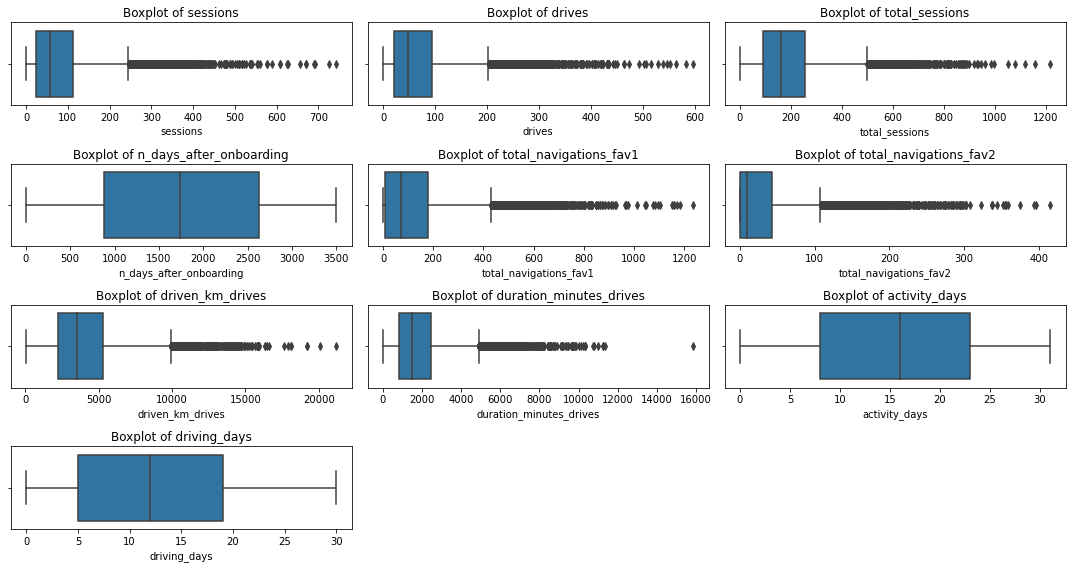

In [8]:
# View with box_plot
columns_to_check = df.select_dtypes(include=['int64','float64']).columns
columns_to_check

plt.figure(figsize=(15, 8))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

**Identifying outliers by comparing max with mean+3\*standard deviation**

In [9]:
columns_to_check = df.select_dtypes(include=['int64','float64']).columns

print('Potential variables having the outliers: ')
for i, column in enumerate(columns_to_check, 1):
    max = df[column].max()
    std = df[column].std()
    mean = df[column].mean()
    if max > (mean+3*std):
        print(column)

        print(max,std, mean)

Potential variables having the outliers: 
sessions
743 80.69906484688346 80.633775585039
drives
596 65.91387241891101 67.28115207680511
total_sessions
1216.154633 136.4051284776033 189.96444682404692
total_navigations_fav1
1236 148.1215436250739 121.60597373158211
total_navigations_fav2
415 45.394650731206816 29.672511500766717
driven_km_drives
21183.40189 2502.149333796495 4039.3409208165035
duration_minutes_drives
15851.72716 1446.7022875633272 1860.9760121293946


**Identifying outliers by compare with IQR**

In [10]:
columns_to_check = df.select_dtypes(include=['int64','float64']).columns
# Calculate summary statistics
summary_stats = df[columns_to_check].describe()
summary_stats

# Calculate IQR for each column
Q1 = summary_stats.loc['25%']
Q3 = summary_stats.loc['75%']
max = summary_stats.loc['max']
IQR = Q3 - Q1

# Identify potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
have_outliers = max > upper_bound

# Display potential outliers
outliers = ((df[columns_to_check] < lower_bound) | (df[columns_to_check] > upper_bound)).any(axis=1)
potential_outliers = df[outliers][columns_to_check]

# Append IQR, upper_bound, and lower_bound to summary_stats
summary_stats = summary_stats.append(pd.Series(IQR, name='IQR'))
summary_stats = summary_stats.append(pd.Series(upper_bound, name='Upper Bound'))
summary_stats = summary_stats.append(pd.Series(lower_bound, name='Lower Bound'))
summary_stats = summary_stats.append(pd.Series(have_outliers, name='Have Outliers'))

summary_stats

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000
IQR,89.000000,73.000000,163.531184,1745.500000,169.000000,43.000000,3077.260656,1628.366372,15.000000,14.000000
Upper Bound,245.500000,202.500000,499.489117,5241.750000,431.500000,107.500000,9905.752245,4906.912190,45.500000,40.000000


In [11]:
potential_outliers

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
0,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19
1,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11
10,23,20,117.225772,1946,0,36,8554.914440,5352.567720,9,9
13,80,64,132.830506,3154,39,16,8531.248070,6324.273457,1,0
17,272,219,564.271485,88,0,90,3529.338980,2078.426838,11,11
...,...,...,...,...,...,...,...,...,...,...
14969,55,44,97.107059,139,618,12,6829.904208,4578.090238,10,10
14982,17,16,46.471611,1656,117,58,8092.458082,5303.678823,12,10
14983,48,40,50.823538,2488,504,0,5340.491350,2513.410279,13,8
14991,50,41,102.444592,1463,0,121,4094.536313,2201.984210,4,2


==> ENTER YOUR RESPONSE HERE

### **Task 2b. Create features**

Create features that may be of interest to the stakeholder and/or that are needed to address the business scenario/problem.

#### **`km_per_driving_day`**

You know from earlier EDA that churn rate correlates with distance driven per driving day in the last month. It might be helpful to engineer a feature that captures this information.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [12]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives']/df['driving_days']

# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

Note that some values are infinite. This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [13]:
# 1. Convert infinite values to zero
df['km_per_driving_day'][np.isinf(df['km_per_driving_day'])]=0

#df['km_per_driving_day'] = df['km_per_driving_day'].replace([np.inf, -np.inf], 0)

# 2. Confirm that it worked
### YOUR CODE HERE ###
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

In [14]:
# 1. Convert infinite values to zero
df['km_per_driving_day'] = df['km_per_driving_day'].replace([np.inf, -np.inf], 0)

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

#### **`professional_driver`**

Create a new, binary feature called `professional_driver` that is a 1 for users who had 60 or more drives <u>**and**</u> drove on 15+ days in the last month.

**Note:** The objective is to create a new feature that separates professional drivers from other drivers. In this scenario, domain knowledge and intuition are used to determine these deciding thresholds, but ultimately they are arbitrary.

To create this column, use the [`np.where()`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) function. This function accepts as arguments:
1. A condition
2. What to return when the condition is true
3. What to return when the condition is false

```
Example:
x = [1, 2, 3]
x = np.where(x > 2, 100, 0)
x
array([  0,   0, 100])
```

In [15]:
# Create `professional_driver` column
df['professional_driver'] = np.where((df['drives']>=60) & (df['driving_days']>=15),1,0)

Perform a quick inspection of the new variable.

1. Check the count of professional drivers and non-professionals

2. Within each class (professional and non-professional) calculate the churn rate

In [16]:
# 1. Check count of professionals and non-professionals
print('Professionals and non-professionals driver:')
df['professional_driver'].value_counts()

Professionals and non-professionals driver:


0    12405
1     2594
Name: professional_driver, dtype: int64

In [17]:
# 2. Check in-class churn rate
### YOUR CODE HERE ###
df.groupby('professional_driver')['label'].value_counts(normalize=True)

professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: label, dtype: float64

The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. This seems like it could add predictive signal to the model.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model.

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

In this stage, consider the following question:

* Why did you select the X variables you did?

==> ENTER YOUR RESPONSE HERE

### **Task 3a. Preparing variables**

Call `info()` on the dataframe to check the data type of the `label` variable and to verify if there are any missing values.

In [18]:
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  km_per_driving_day       14999 non-null  float64
 13  professional_driver      14999 non-null  int64  
dtypes: float64(4), int64(8

Because you know from previous EDA that there is no evidence of a non-random cause of the 700 missing values in the `label` column, and because these observations comprise less than 5% of the data, use the `dropna()` method to drop the rows that are missing this data.

In [19]:
# Drop rows with missing data in `label` column
df = df.dropna(subset=['label'])

#### **Impute outliers**

You rarely want to drop outliers, and generally will not do so unless there is a clear reason for it (e.g., typographic errors).

At times outliers can be changed to the **median, mean, 95th percentile, etc.**

Previously, you determined that seven of the variables had clear signs of containing outliers:

* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`

For this analysis, impute the outlying values for these columns. Calculate the **95th percentile** of each column and change to this value any value in the column that exceeds it.


In [20]:
# Impute outliers
columns_to_impute = ['sessions','drives','total_sessions','total_navigations_fav1','total_navigations_fav2',
                    'driven_km_drives','duration_minutes_drives']
print('95th percentile of :')
for i in columns_to_impute:
    percentile_95 = np.percentile(df[i], 95)
    # Use np.minimum to replace values above the 95th percentile with the 95th percentile value
    print(f'{i} : {percentile_95:.2f}')
    df[i] = np.minimum(df[i], percentile_95)

95th percentile of :
sessions : 243.00
drives : 200.00
total_sessions : 455.44
total_navigations_fav1 : 422.00
total_navigations_fav2 : 124.00
driven_km_drives : 8898.72
duration_minutes_drives : 4668.18


Call `describe()`.

In [21]:
### YOUR CODE HERE ###
df[columns_to_impute].describe()

,sessions,drives,total_sessions,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,114.562767,27.187216,3944.558631,1792.911210
std,67.243178,55.127927,118.720520,124.378550,36.715302,2218.358258,1224.329759
min,0.000000,0.000000,0.220211,0.000000,0.000000,60.441250,18.282082
25%,23.000000,20.000000,90.457733,10.000000,0.000000,2217.319909,840.181344
50%,56.000000,48.000000,158.718571,71.000000,9.000000,3496.545617,1479.394387
75%,111.000000,93.000000,253.540450,178.000000,43.000000,5299.972162,2466.928876
max,243.000000,200.000000,455.439492,422.000000,124.000000,8898.716275,4668.180092


#### **Encode categorical variables**

Change the data type of the `label` column to be binary. This change is needed to train a logistic regression model.

Assign a `0` for all `retained` users.

Assign a `1` for all `churned` users.

Save this variable as `label2` as to not overwrite the original `label` variable.

**Note:** There are many ways to do this. Consider using `np.where()` as you did earlier in this notebook.

In [22]:
# Create binary `label2` column
df['label2'] = np.where(df['label']=='retained',0,1)

In [23]:
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,professional_driver,label2
0,retained,243.0,200.0,296.748273,2276,208.0,0.0,2628.845068,1985.775061,28,19,Android,138.360267,1,0
1,retained,133.0,107.0,326.896596,1225,19.0,64.0,8898.716275,3160.472914,13,11,iPhone,1246.901868,0,0
2,retained,114.0,95.0,135.522926,2651,0.0,0.0,3059.148818,1610.735904,14,8,Android,382.393602,0,0
3,retained,49.0,40.0,67.589221,15,322.0,7.0,913.591123,587.196542,7,3,iPhone,304.530374,0,0
4,retained,84.0,68.0,168.247020,1562,166.0,5.0,3950.202008,1219.555924,27,18,Android,219.455667,1,0


### **Task 3b. Determine whether assumptions have been met**

The following are the assumptions for logistic regression:

* Independent observations (This refers to how the data was collected.)

* No extreme outliers

* Little to no multicollinearity among X predictors

* Linear relationship between X and the **logit** of y

For the first assumption, you can assume that observations are independent for this project.

The second assumption has already been addressed.

The last assumption will be verified after modeling.

**Note:** In practice, modeling assumptions are often violated, and depending on the specifics of your use case and the severity of the violation, it might not affect your model much at all or it will result in a failed model.

#### **Collinearity**

Check the correlation among predictor variables. First, generate a correlation matrix.

In [24]:
# Generate a correlation matrix
### YOUR CODE HERE ###
correlation_matrix = df.corr()
correlation_matrix

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,label2
sessions,1.000000,0.996942,0.597189,0.007101,0.001858,0.008536,0.002996,-0.004545,0.025113,0.020294,-0.011569,0.443654,0.034911
drives,0.996942,1.000000,0.595285,0.006940,0.001058,0.009505,0.003445,-0.003889,0.024357,0.019608,-0.010989,0.444425,0.035865
total_sessions,0.597189,0.595285,1.000000,0.006596,0.000187,0.010371,0.001016,-0.000338,0.015755,0.012953,-0.016167,0.254433,0.024568
n_days_after_onboarding,0.007101,0.006940,0.006596,1.000000,-0.002450,-0.004968,-0.004652,-0.010167,-0.009418,-0.007321,0.011764,0.003770,-0.129263
total_navigations_fav1,0.001858,0.001058,0.000187,-0.002450,1.000000,0.002866,-0.007368,0.005646,0.010902,0.010419,-0.000197,-0.000224,0.052322
total_navigations_fav2,0.008536,0.009505,0.010371,-0.004968,0.002866,1.000000,0.003559,-0.003009,-0.004425,0.002000,0.006751,0.007126,0.015032
driven_km_drives,0.002996,0.003445,0.001016,-0.004652,-0.007368,0.003559,1.000000,0.690515,-0.007441,-0.009549,0.344811,-0.000904,0.019767
duration_minutes_drives,-0.004545,-0.003889,-0.000338,-0.010167,0.005646,-0.003009,0.690515,1.000000,-0.007895,-0.009425,0.239627,-0.012128,0.040407
activity_days,0.025113,0.024357,0.015755,-0.009418,0.010902,-0.004425,-0.007441,-0.007895,1.000000,0.947687,-0.397433,0.453825,-0.303851
driving_days,0.020294,0.019608,0.012953,-0.007321,0.010419,0.002000,-0.009549,-0.009425,0.947687,1.000000,-0.407917,0.469776,-0.294259


Now, plot a correlation heatmap.

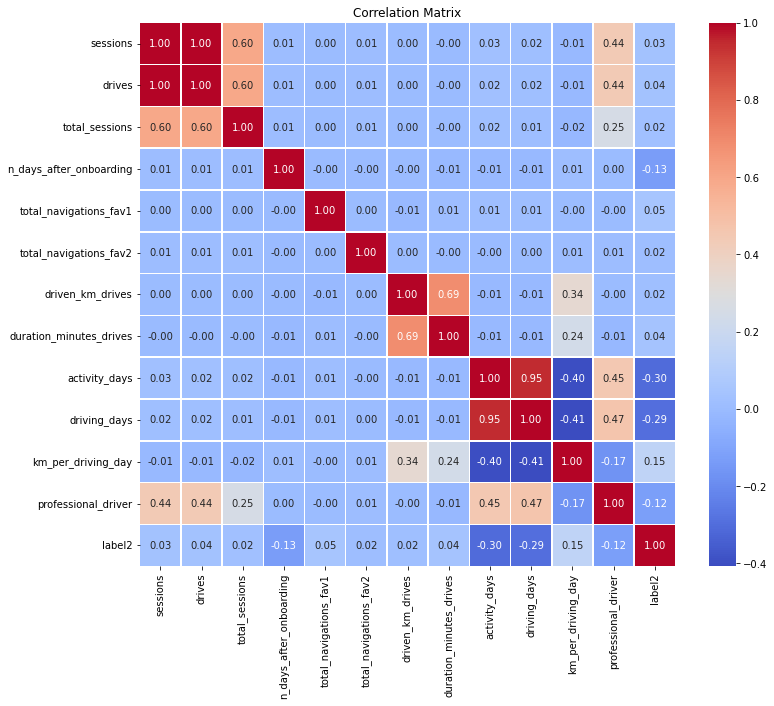

In [25]:
# Plot correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

If there are predictor variables that have a Pearson correlation coefficient value greater than the **absolute value of 0.7**, these variables are strongly multicollinear. Therefore, only one of these variables should be used in your model.

**Note:** 0.7 is an arbitrary threshold. Some industries may use 0.6, 0.8, etc.

**Question:** Which variables are multicollinear with each other?

> - `sessions` and `drives` : 1
> - `activity_days` and `driving_days` : 0.95

### **Task 3c. Create dummies (if necessary)**

If you have selected `device` as an X variable, you will need to create dummy variables since this variable is categorical.

In cases with many categorical variables, you can use pandas built-in [`pd.get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), or you can use scikit-learn's [`OneHotEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) function.

**Note:** Variables with many categories should only be dummied if absolutely necessary. Each category will result in a coefficient for your model which can lead to overfitting.

Because this dataset only has one remaining categorical feature (`device`), it's not necessary to use one of these special functions. You can just implement the transformation directly.

Create a new, binary column called `device2` that encodes user devices as follows:

* `Android` -> `0`
* `iPhone` -> `1`

In [26]:
# Create new `device2` variable
### YOUR CODE HERE ###
df['device2'] = np.where(df['device'] == 'Android', 0,1)

In [27]:
df[['device','device2']].tail()

,device,device2
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


### **Task 3d. Model building**

#### **Assign predictor variables and target**

To build your model you need to determine what X variables you want to include in your model to predict your target&mdash;`label2`.

Drop the following variables and assign the results to `X`:

* `label` (this is the target)
* `label2` (this is the target)
* `device` (this is the non-binary-encoded categorical variable)
* `sessions` (this had high multicollinearity)
* `driving_days` (this had high multicollinearity)

**Note:** Notice that `sessions` and `driving_days` were selected to be dropped, rather than `drives` and `activity_days`. The reason for this is that the features that were kept for modeling had slightly stronger correlations with the target variable than the features that were dropped.

In [28]:
# Isolate predictor variables
X = df.drop(columns = ['label','label2','device','sessions','driving_days'])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14299 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   drives                   14299 non-null  float64
 1   total_sessions           14299 non-null  float64
 2   n_days_after_onboarding  14299 non-null  int64  
 3   total_navigations_fav1   14299 non-null  float64
 4   total_navigations_fav2   14299 non-null  float64
 5   driven_km_drives         14299 non-null  float64
 6   duration_minutes_drives  14299 non-null  float64
 7   activity_days            14299 non-null  int64  
 8   km_per_driving_day       14299 non-null  float64
 9   professional_driver      14299 non-null  int64  
 10  device2                  14299 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 1.3 MB


Now, isolate the dependent (target) variable. Assign it to a variable called `y`.

In [29]:
# Isolate target variable
y = df['label2']

#### **Split the data**

Use scikit-learn's [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to perform a train/test split on your data using the X and y variables you assigned above.

**Note 1:** It is important to do a train test to obtain accurate predictions.  You always want to fit your model on your training set and evaluate your model on your test set to avoid data leakage.

**Note 2:** Because the target class is imbalanced (82% retained vs. 18% churned), you want to make sure that you don't get an unlucky split that over- or under-represents the frequency of the minority class. Set the function's `stratify` parameter to `y` to ensure that the minority class appears in both train and test sets in the same proportion that it does in the overall dataset.

In [30]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [31]:
# Use .head()
X_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2
152,108.0,186.192746,3116,243.0,124.0,8898.716275,4668.180092,24,612.305861,1,1
11899,2.0,3.487590,794,114.0,18.0,3286.545691,1780.902733,5,3286.545691,0,1
10937,139.0,347.106403,331,4.0,7.0,7400.838975,2349.305267,15,616.736581,0,0
669,108.0,455.439492,2320,11.0,4.0,6566.424830,4558.459870,18,410.401552,1,1
8406,10.0,89.475821,2478,135.0,0.0,1271.248661,938.711572,27,74.779333,0,1


In [32]:
X_train.dtypes

drives                     float64
total_sessions             float64
n_days_after_onboarding      int64
total_navigations_fav1     float64
total_navigations_fav2     float64
driven_km_drives           float64
duration_minutes_drives    float64
activity_days                int64
km_per_driving_day         float64
professional_driver          int64
device2                      int64
dtype: object

In [33]:
y_train.dtypes

dtype('int64')

Use scikit-learn to instantiate a logistic regression model. Add the argument `penalty = None`.

It is important to add `penalty = None` since your predictors are unscaled.

Refer to scikit-learn's [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) documentation for more information.

Fit the model on `X_train` and `y_train`.

In [34]:
model = LogisticRegression(penalty='none', max_iter=400)
#model = LogisticRegression(random_state=0,penalty = 'none').fit(X_train, y_train)

In [35]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Call the `.coef_` attribute on the model to get the coefficients of each variable.  The coefficients are in order of how the variables are listed in the dataset.  Remember that the coefficients represent the change in the **log odds** of the target variable for **every one unit increase in X**.

If you want, create a series whose index is the column names and whose values are the coefficients in `model.coef_`.

In [36]:
# Retrieve the coefficients
# Create a Pandas Series with coefficients and column names
coefficients_series = pd.Series(model.coef_[0], index=X.columns)

print("Coefficients:\n", coefficients_series)

Coefficients:
 drives                     0.001913
total_sessions             0.000327
n_days_after_onboarding   -0.000406
total_navigations_fav1     0.001232
total_navigations_fav2     0.000931
driven_km_drives          -0.000015
duration_minutes_drives    0.000109
activity_days             -0.106032
km_per_driving_day         0.000018
professional_driver       -0.001529
device2                   -0.001041
dtype: float64


Call the model's `intercept_` attribute to get the intercept of the model.

In [37]:
### YOUR CODE HERE ###
model.intercept_

array([-0.00170675])

#### **Check final assumption**

Verify the linear relationship between X and the estimated log odds (known as logits) by making a regplot.

Call the model's `predict_proba()` method to generate the probability of response for each sample in the training data. (The training data is the argument to the method.) Assign the result to a variable called `training_probabilities`. This results in a 2-D array where each row represents a user in `X_train`. The first column is the probability of the user not churning, and the second column is the probability of the user churning.

In [38]:
# Get the predicted probabilities of the training data
### YOUR CODE HERE ###
# Use predict_proba() to get probability estimates for each class
training_probabilities = model.predict_proba(X_train)

# The result is an array where each row corresponds to a sample, and each column corresponds to a class
print("Probabilities for each class:")
print(training_probabilities)

Probabilities for each class:
[[0.93963483 0.06036517]
 [0.61967304 0.38032696]
 [0.76463181 0.23536819]
 ...
 [0.91909641 0.08090359]
 [0.85092112 0.14907888]
 [0.93516293 0.06483707]]


In [39]:
probabilities_df = pd.DataFrame(training_probabilities, columns=['Probability_Retained', 'Probability_Churning'])
probabilities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10724 entries, 0 to 10723
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Probability_Retained  10724 non-null  float64
 1   Probability_Churning  10724 non-null  float64
dtypes: float64(2)
memory usage: 167.7 KB


In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where _p_ is the probability of response:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

1. Create a dataframe called `logit_data` that is a copy of `df`.

2. Create a new column called `logit` in the `logit_data` dataframe. The data in this column should represent the logit for each user.


> As we have assigned a **0** for all **retained users** and **1** for all **churned** users. 
Then we can add logit(p) into `probabilities_df` as following

In [40]:
probabilities_df['logit'] = np.log(probabilities_df['Probability_Churning']/
                                     probabilities_df['Probability_Retained'])
probabilities_df

,Probability_Retained,Probability_Churning,logit
0,0.939635,0.060365,-2.745079
1,0.619673,0.380327,-0.488161
2,0.764632,0.235368,-1.178243
3,0.888529,0.111471,-2.075803
4,0.972703,0.027297,-3.573298
...,...,...,...
10719,0.562794,0.437206,-0.252510
10720,0.970812,0.029188,-3.504373
10721,0.919096,0.080904,-2.430133
10722,0.850921,0.149079,-1.741844


In [41]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
# Reset the indices of both DataFrames
logit_data = logit_data.reset_index(drop=True)
probabilities_df = probabilities_df.reset_index(drop=True)

# Copy the 'logit_p' column from probabilities_df to logit_data
logit_data = pd.concat([logit_data, probabilities_df['logit']], axis=1)
logit_data

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2,logit
0,108.0,186.192746,3116,243.0,124.0,8898.716275,4668.180092,24,612.305861,1,1,-2.745079
1,2.0,3.487590,794,114.0,18.0,3286.545691,1780.902733,5,3286.545691,0,1,-0.488161
2,139.0,347.106403,331,4.0,7.0,7400.838975,2349.305267,15,616.736581,0,0,-1.178243
3,108.0,455.439492,2320,11.0,4.0,6566.424830,4558.459870,18,410.401552,1,1,-2.075803
4,10.0,89.475821,2478,135.0,0.0,1271.248661,938.711572,27,74.779333,0,1,-3.573298
...,...,...,...,...,...,...,...,...,...,...,...,...
10719,12.0,95.550956,801,250.0,4.0,2031.247401,1326.508435,4,1015.623701,0,0,-0.252510
10720,78.0,436.258238,2511,0.0,39.0,8227.304692,2512.499678,28,457.072483,1,0,-3.504373
10721,52.0,121.027899,28,12.0,0.0,7929.973718,4668.180092,28,417.367038,0,1,-2.430133
10722,12.0,134.824277,1855,73.0,55.0,8347.946528,2601.703172,13,1391.324421,0,1,-1.741844


In [42]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df

# Copy the 'logit_p' column from probabilities_df to logit_data
logit_data['logit'] = probabilities_df['logit'].values
logit_data

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2,logit
152,108.0,186.192746,3116,243.0,124.0,8898.716275,4668.180092,24,612.305861,1,1,-2.745079
11899,2.0,3.487590,794,114.0,18.0,3286.545691,1780.902733,5,3286.545691,0,1,-0.488161
10937,139.0,347.106403,331,4.0,7.0,7400.838975,2349.305267,15,616.736581,0,0,-1.178243
669,108.0,455.439492,2320,11.0,4.0,6566.424830,4558.459870,18,410.401552,1,1,-2.075803
8406,10.0,89.475821,2478,135.0,0.0,1271.248661,938.711572,27,74.779333,0,1,-3.573298
...,...,...,...,...,...,...,...,...,...,...,...,...
13365,12.0,95.550956,801,250.0,4.0,2031.247401,1326.508435,4,1015.623701,0,0,-0.252510
8232,78.0,436.258238,2511,0.0,39.0,8227.304692,2512.499678,28,457.072483,1,0,-3.504373
1556,52.0,121.027899,28,12.0,0.0,7929.973718,4668.180092,28,417.367038,0,1,-2.430133
2893,12.0,134.824277,1855,73.0,55.0,8347.946528,2601.703172,13,1391.324421,0,1,-1.741844


In [43]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df

# Copy the 'logit_p' column from probabilities_df to logit_data
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]
logit_data

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2,logit
152,108.0,186.192746,3116,243.0,124.0,8898.716275,4668.180092,24,612.305861,1,1,-2.745079
11899,2.0,3.487590,794,114.0,18.0,3286.545691,1780.902733,5,3286.545691,0,1,-0.488161
10937,139.0,347.106403,331,4.0,7.0,7400.838975,2349.305267,15,616.736581,0,0,-1.178243
669,108.0,455.439492,2320,11.0,4.0,6566.424830,4558.459870,18,410.401552,1,1,-2.075803
8406,10.0,89.475821,2478,135.0,0.0,1271.248661,938.711572,27,74.779333,0,1,-3.573298
...,...,...,...,...,...,...,...,...,...,...,...,...
13365,12.0,95.550956,801,250.0,4.0,2031.247401,1326.508435,4,1015.623701,0,0,-0.252510
8232,78.0,436.258238,2511,0.0,39.0,8227.304692,2512.499678,28,457.072483,1,0,-3.504373
1556,52.0,121.027899,28,12.0,0.0,7929.973718,4668.180092,28,417.367038,0,1,-2.430133
2893,12.0,134.824277,1855,73.0,55.0,8347.946528,2601.703172,13,1391.324421,0,1,-1.741844


Plot a regplot where the x-axis represents an independent variable and the y-axis represents the log-odds of the predicted probabilities.

In an exhaustive analysis, this would be plotted for each continuous or discrete predictor variable. Here we show only `driving_days`.

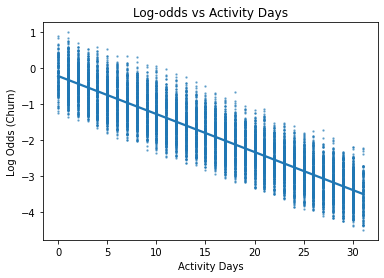

In [44]:
# Plot regplot of `activity_days` log-odds
### YOUR CODE HERE ###

# Create a regplot
sns.regplot(x='activity_days', y='logit', data=logit_data, 
            scatter_kws={'s': 2, 'alpha': 0.5})

# Add labels and title
plt.xlabel('Activity Days')
plt.ylabel('Log Odds (Churn)')
plt.title('Log-odds vs Activity Days')

# Show the plot
plt.show()

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4a. Results and evaluation**

If the logistic assumptions are met, the model results can be appropriately interpreted.

Use the code block below to make predictions on the test data.


In [45]:
# Generate predictions on X_test
y_pred = model.predict(X_test)

Now, use the `score()` method on the model with `X_test` and `y_test` as its two arguments. The default score in scikit-learn is **accuracy**.  What is the accuracy of your model?

*Consider:  Is accuracy the best metric to use to evaluate this model?*

In [46]:
# Score the model (accuracy) on the test data
model.score(X_test,y_test)

0.8237762237762237

### **Task 4b. Show results with a confusion matrix**

Use the `confusion_matrix` function to obtain a confusion matrix. Use `y_test` and `y_preds` as arguments.

In [47]:
### YOUR CODE HERE ###
log_cm = confusion_matrix(y_test, y_pred, labels=model.classes_) 

Next, use the `ConfusionMatrixDisplay()` function to display the confusion matrix from the above cell, passing the confusion matrix you just created as its argument.

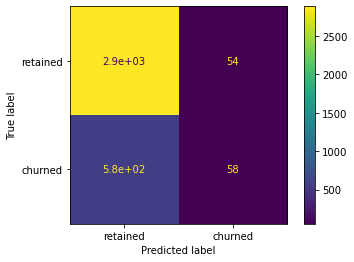

In [48]:
# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=['retained', 'churned'])

# Plot confusion matrix
log_disp.plot();

You can use the confusion matrix to compute precision and recall manually. You can also use scikit-learn's [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function to generate a table from `y_test` and `y_preds`.

In [49]:
# Calculate precision manually
precision = log_cm[1,1]/(log_cm[1,1]+log_cm[0,1])
precision

0.5178571428571429

In [50]:
# Calculate recall manually
recall = log_cm[1,1]/(log_cm[1,1]+log_cm[1,0])
recall                 

0.0914826498422713

In [51]:
# Create a classification report
from sklearn.metrics import classification_report, accuracy_score
# Generate classification report
report = classification_report(y_test, y_pred,
                               target_names=['retained', 'churned'])

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the classification report and accuracy
bold_text = '\033[1m'
reset_format = '\033[0m'

print(f'{bold_text}Classification Report:\n{reset_format}{report}')
print(f'{bold_text}Accuracy:{reset_format} %.6f' % accuracy)

Classification Report:
              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2941
     churned       0.52      0.09      0.16       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575

Accuracy: 0.823776


In [52]:
### YOUR CODE HERE ###
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Classification Report:\n")
# Print the results
print('Accuracy: %.6f' % accuracy)
print('Precision: %.6f' % precision)
print('Recall: %.6f' % recall)
print('F1 Score: %.6f' % f1)

Classification Report:

Accuracy: 0.823776
Precision: 0.517857
Recall: 0.091483
F1 Score: 0.155496


**Note:** The model has decent precision but very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.

Your model's performance metrics are looking pretty good overall!

_**Accuracy (0.823776):** This indicates the proportion of correctly classified instances among the total instances. A high accuracy suggests the model is doing well in making correct predictions.
**Precision (0.517857):** Precision is the ratio of correctly predicted positive observations to the total predicted positives. In your case, around 52% of the instances predicted as positive were indeed positive.
**Recall (0.091483):** Recall, or sensitivity, is the ratio of correctly predicted positive observations to the all observations in actual class. A value of 0.091483 suggests the model may be missing some positive instances.
**F1 Score (0.155496):** F1 Score is the weighted average of Precision and Recall. It's a good metric for a balance between precision and recall.

### **BONUS**

Generate a bar graph of the model's coefficients for a visual representation of the importance of the model's features.

In [55]:
# Create a list of (column_name, coefficient) tuples
# Get feature names
feature_names = X_train.columns

# Create a DataFrame with feature names and corresponding coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': model.coef_[0]})

# Sort the list by coefficient value
coef_df = coef_df.sort_values(by='Coefficient')
coef_df

,Feature,Coefficient
7,activity_days,-0.106032
9,professional_driver,-0.001529
10,device2,-0.001041
2,n_days_after_onboarding,-0.000406
5,driven_km_drives,-0.000015
8,km_per_driving_day,0.000018
6,duration_minutes_drives,0.000109
1,total_sessions,0.000327
4,total_navigations_fav2,0.000931
3,total_navigations_fav1,0.001232


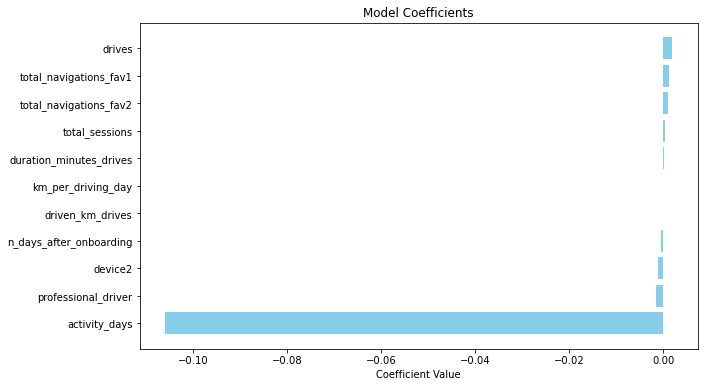

In [54]:
# Plot the feature importances
# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh('Feature', 'Coefficient',data=coef_df,
         color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Model Coefficients')

plt.show()

### **Task 4c. Conclusion**

Now that you've built your regression model, the next step is to share your findings with the Waze leadership team. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. What variable most influenced the model's prediction? How? Was this surprising?

> It seems like the variable `activity_days` plays a crucial role in shaping the model's predictions. The notable negative correlation coefficient of -0.106032 suggests that as `activity_days` decreases, the likelihood of churn increases. In simpler terms, lower `activity_days` seem to be associated with a higher probability of churn.

2. Were there any variables that you expected to be stronger predictors than they were?

> _Yes. In previous EDA, user churn rate increased as the values in `km_per_driving_day` increased. The correlation heatmap here in this notebook revealed this variable to have the strongest positive correlation with churn of any of the predictor variables by a relatively large margin. In the model, it was the second-least-important variable._

3. Why might a variable you thought to be important not be important in the model?

> _In a multiple logistic regression model, features can interact with each other and these interactions can result in seemingly counterintuitive relationships. This is both a strength and a weakness of predictive models, as capturing these interactions typically makes a model more predictive while at the same time making the model more difficult to explain._

4. Would you recommend that Waze use this model? Why or why not?

> The decision to use this model depends on the specific context and goals of your project. Here are some considerations:
1. **Overall Performance:** Our model has a decent accuracy, but it seems to struggle with recall. If the primary concern is correctly identifying instances of positive cases (churn in this case), you might want to explore ways to improve recall.
2. **Business Objectives:** Consider the consequences of false positives and false negatives. If misclassifying a churn case has significant business implications, you might want to prioritize either precision or recall accordingly.
3. **Threshold Adjustment:** Depending on your model's application, you can adjust the classification threshold to prioritize precision or recall. A lower threshold increases recall but might decrease precision, and vice versa.
4. **Further Tuning:** Evaluate whether fine-tuning the model or exploring different algorithms could improve performance. It's always good to experiment and see if you can achieve a better balance between various metrics.
5. **Domain Expertise:** Consult with domain experts to understand if the model aligns with their expectations and if the predictions make sense in the context of your industry.
>
> _In summary, while the model has strengths, it's essential to align its performance with your specific business goals and consider potential consequences of misclassifications. Fine-tuning and experimenting with different approaches could lead to a more robust and effective model._

5. What could you do to improve this model ?

> We've created a new feature called `professional_driver`, but its potential hasn't been fully utilized yet. Incorporating this new feature can enhance our data analysis and model construction in several ways. It provides an opportunity to cluster our data effectively, classify predictor variables more precisely, and experiment with different model combinations. Additionally, leveraging this feature has the potential to reduce noise stemming from unpredictable variables. Let's explore how integrating `professional_driver` into our analysis can contribute to a more robust and accurate model.

6. What additional features would you like to have to help improve the model?


==> ENTER YOUR RESPONSES TO QUESTIONS 1-6 HERE

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 